In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration


In [2]:
pmf_dehp = pd.read_csv('2-DEHP.xvg', header = None, delim_whitespace=True)

In [3]:
# Checking the few data from pmf_dehp
pmf_dehp.head()

,0,1,2
0,0.005008,-44.65238,1.794111
1,0.015025,-44.65342,1.790558
2,0.025042,-44.62829,1.788121
3,0.035059,-44.61256,1.785940
4,0.045076,-44.59555,1.783410


In [4]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: -44.65238, 2:1.794111})
df = df.append(pmf_dehp)
df = df.reset_index(drop=True)

In [5]:
# Just making a copy to have same name as original
pmf_dehp = df.copy(deep=True)

In [6]:
pmf_dehp

,0,1,2
0,0.000000,-44.652380,1.794111
1,0.005008,-44.652380,1.794111
2,0.015025,-44.653420,1.790558
3,0.025042,-44.628290,1.788121
4,0.035059,-44.612560,1.785940
...,...,...,...
417,4.172054,-0.101668,0.014071
418,4.182071,0.049095,0.015160
419,4.192088,-0.149261,0.015889
420,4.202105,0.595437,0.016376


In [7]:
# We don't want the values of z distance above 4, so
pmf_dehp = pmf_dehp[pmf_dehp[0] <= 4.000000]

In [8]:
pmf_dehp.tail()

,0,1,2
395,3.951681,0.124851,0.022008
396,3.961698,0.121398,0.022350
397,3.971715,0.132617,0.013916
398,3.981732,0.100150,0.014667
399,3.991749,0.097642,0.014463


In [9]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.991749
pmf_dehp = pmf_dehp.append({0: 4.000000, 1: 0.097642, 2: 0.014463}, ignore_index = True)

In [10]:
pmf_dehp

,0,1,2
0,0.000000,-44.652380,1.794111
1,0.005008,-44.652380,1.794111
2,0.015025,-44.653420,1.790558
3,0.025042,-44.628290,1.788121
4,0.035059,-44.612560,1.785940
...,...,...,...
396,3.961698,0.121398,0.022350
397,3.971715,0.132617,0.013916
398,3.981732,0.100150,0.014667
399,3.991749,0.097642,0.014463


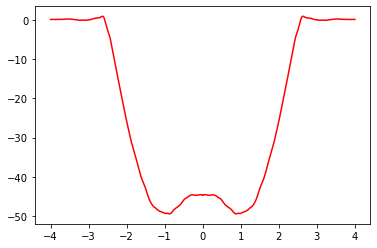

In [13]:
# Now, check a rough plot for free energy
plt.plot(pmf_dehp[0], pmf_dehp[1], color = 'r')
plt.plot(-pmf_dehp[0], pmf_dehp[1], color = 'r')

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column pmf_dehp[1] and RT is 2.478 KJ/mol at 298K.

In [14]:
pmf_dehp[3] = np.exp(pmf_dehp[1]/2.478)

In [15]:
pmf_dehp

,0,1,2,3
0,0.000000,-44.652380,1.794111,1.493552e-08
1,0.005008,-44.652380,1.794111,1.493552e-08
2,0.015025,-44.653420,1.790558,1.492925e-08
3,0.025042,-44.628290,1.788121,1.508142e-08
4,0.035059,-44.612560,1.785940,1.517746e-08
...,...,...,...,...
396,3.961698,0.121398,0.022350,1.050210e+00
397,3.971715,0.132617,0.013916,1.054976e+00
398,3.981732,0.100150,0.014667,1.041243e+00
399,3.991749,0.097642,0.014463,1.040190e+00


In [16]:
# Just checking some values in the last column if it makes sense
np.exp(-44.652380/2.478)

1.4935516397821283e-08

In [17]:
diff_dehp = pd.read_csv('DEHP_dif.txt', header = None, delim_whitespace=True)

In [19]:
diff_dehp.head()

,0,1
0,0.0,1.616121e-06
1,0.1,5.624232e-07
2,0.2,8.932635e-09
3,0.3,5.504893e-07
4,0.4,1.965968e-07


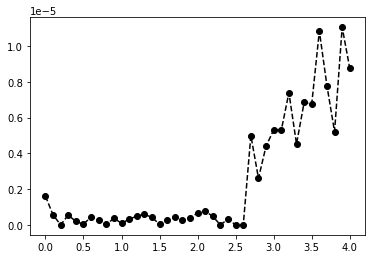

In [21]:
# Let's plot the data for diffusion coefficent of DEP
plt.plot(diff_dehp[0], diff_dehp[1], '--o', color = 'k')

Here, the linear interpolation is done for our diffusion coefficient so that we can obtain the missing values at the position specified by the PMF data. The function takes these values **np.interp(The z-coordinates at which to evaluate the interpolated values, The z-coordinates of the data points, The function values of these data points)**

In [22]:
diffusion_interpl = np.interp(pmf_dehp[0], diff_dehp[0], diff_dehp[1])

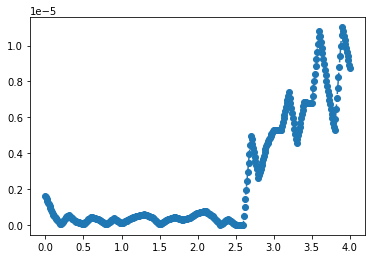

In [23]:
## Let's plot these interpolated values against the z - data points given by pmf_dep[0]
plt.plot(pmf_dehp[0], diffusion_interpl, '--o')

In [24]:
diff_dehp = pd.DataFrame({0: pmf_dehp[0].copy(deep = True), 1 : diffusion_interpl})

In [25]:
diff_dehp.head()

,0,1
0,0.000000,0.000002
1,0.005008,0.000002
2,0.015025,0.000001
3,0.025042,0.000001
4,0.035059,0.000001


In [26]:
pmf_dehp.head()

,0,1,2,3
0,0.000000,-44.65238,1.794111,1.493552e-08
1,0.005008,-44.65238,1.794111,1.493552e-08
2,0.015025,-44.65342,1.790558,1.492925e-08
3,0.025042,-44.62829,1.788121,1.508142e-08
4,0.035059,-44.61256,1.785940,1.517746e-08


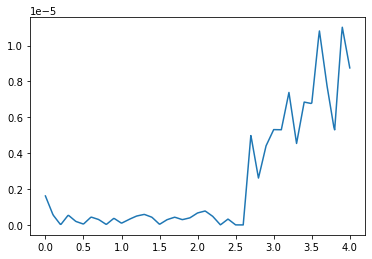

In [27]:
plt.plot(diff_dehp[0], diff_dehp[1])

#### My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both pmf as well as diffusion coefficient. 

In [28]:
# For pmf_dep it will be ---
pmf_dehp[0] = pmf_dehp[0] * 1 * 10 ** -7
pmf_dehp.head()
# Here, the only columns we need to worry about is at the index 0 and 3 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2,3
0,0.000000e+00,-44.65238,1.794111,1.493552e-08
1,5.008469e-10,-44.65238,1.794111,1.493552e-08
2,1.502540e-09,-44.65342,1.790558,1.492925e-08
3,2.504234e-09,-44.62829,1.788121,1.508142e-08
4,3.505928e-09,-44.61256,1.785940,1.517746e-08


In [29]:
pmf_dehp.tail()

,0,1,2,3
396,3.961698e-07,0.121398,0.022350,1.050210
397,3.971715e-07,0.132617,0.013916,1.054976
398,3.981732e-07,0.100150,0.014667,1.041243
399,3.991749e-07,0.097642,0.014463,1.040190
400,4.000000e-07,0.097642,0.014463,1.040190


In [30]:
integrand = pmf_dehp[3]/diff_dehp[1]

In [35]:
np.exp(-44.65238/2.478)/1.6161208e-06

0.009241584167360066

In [32]:
integrand[0]

0.009241584167360067

In [34]:
diff_dehp[1][0]

1.6161208e-06

In [36]:
trapz(integrand, pmf_dehp[0])

2.961257081456137

In [37]:
pmf_dehp[0]

0      0.000000e+00
1      5.008469e-10
2      1.502540e-09
3      2.504234e-09
4      3.505928e-09
           ...     
396    3.961698e-07
397    3.971715e-07
398    3.981732e-07
399    3.991749e-07
400    4.000000e-07
Name: 0, Length: 401, dtype: float64

In [38]:
1/trapz(integrand, diff_dehp[0] * 1 * 10 **-7)

0.3376944225012273

In [41]:
integ = pd.DataFrame({0: pmf_dehp[0], 1: integrand})

In [42]:
integ

,0,1
0,0.000000e+00,0.009242
1,5.008469e-10,0.009554
2,1.502540e-09,0.010241
3,2.504234e-09,0.011153
4,3.505928e-09,0.012174
...,...,...
396,3.961698e-07,109006.778151
397,3.971715e-07,112188.536238
398,3.981732e-07,113513.732187
399,3.991749e-07,116325.283242


In [43]:
# You can also export the data to xmgrace and calculate the area by yourself
integ.to_csv('integrand_dehp.xvg', index = False, header = None, sep = ' ')

In [44]:
!xmgrace integrand_dehp.xvg

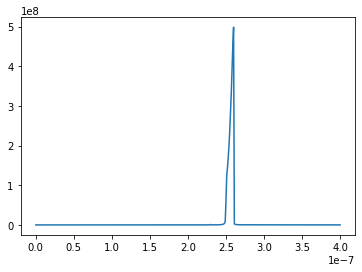

In [47]:
plt.plot(integ[0], integ[1])